In [28]:
!pip install scikit-learn

     --------------------------------------- 11.1/11.1 MB 27.3 MB/s eta 0:00:00
  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:


data = pd.read_json("price.json")
wings_data = pd.json_normalize(data["wings"])
    

In [4]:
filtered_data = wings_data[wings_data["price"]<48888]

In [5]:
wings_data_backup = wings_data

In [6]:
print(filtered_data.head())
wings_data = filtered_data

   comprehensive_score  cultivation_score  privilege_rating  privilege_number  \
0                 9518                368              1218                 5   
1                 9957                542              1557                 5   
2                 9631                352              1185                 5   
3                10817                609              1787                 6   
5                12735               1157              2993                 7   

   color  texture  size  speed  price  
0   1722     2138  2640   1800   5800  
1   1680     2160  2760   1800   8000  
2   1980     2040  2760   1666   6900  
3   2070     1920  2640   2400   8750  
5   2182     1920  2760   2880  19500  


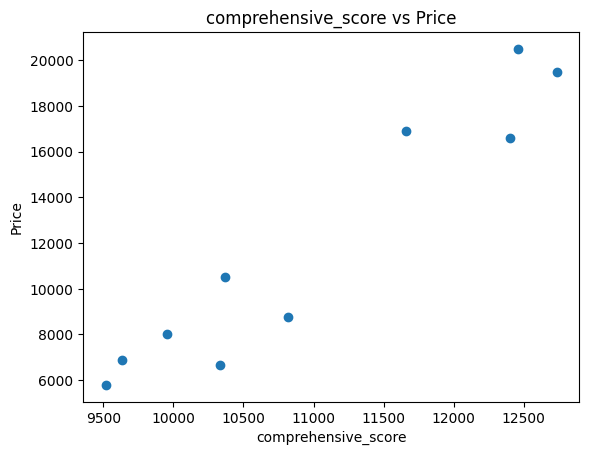

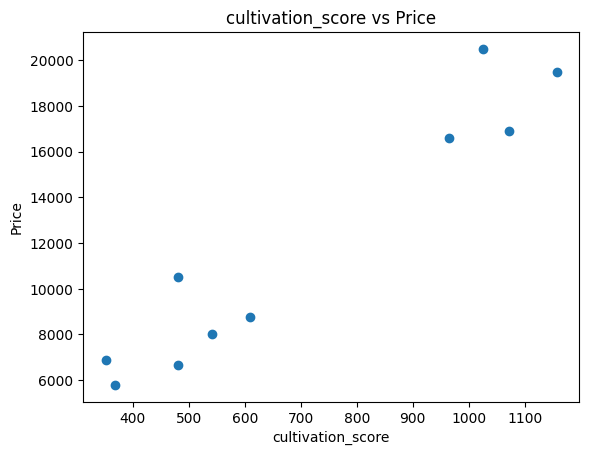

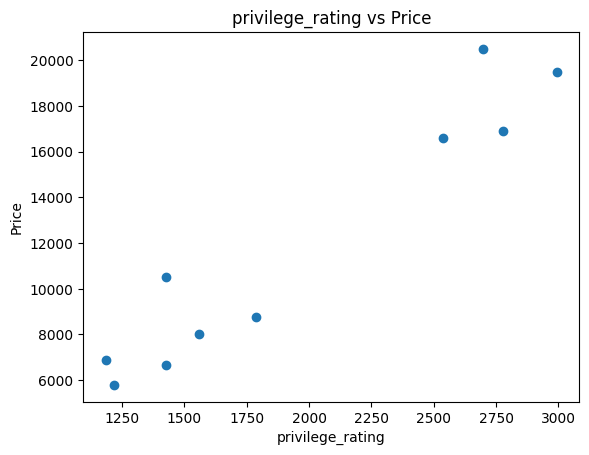

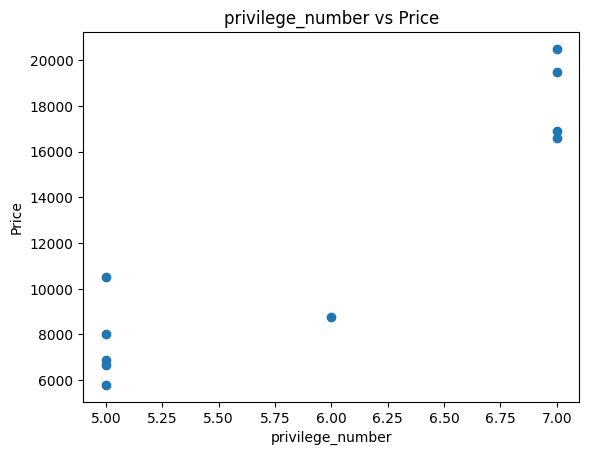

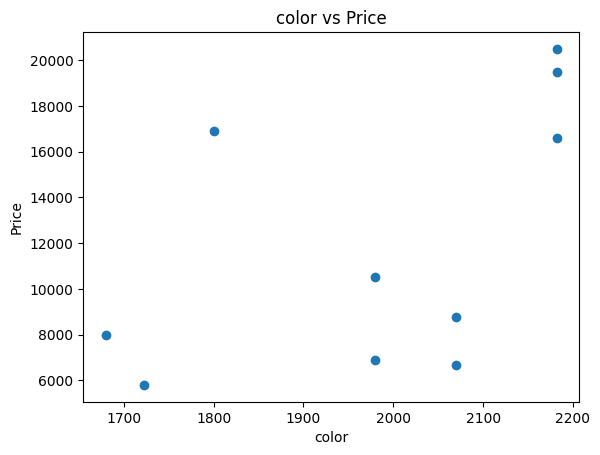

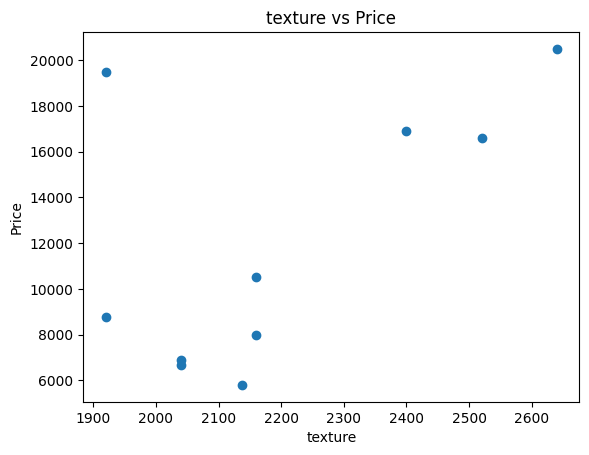

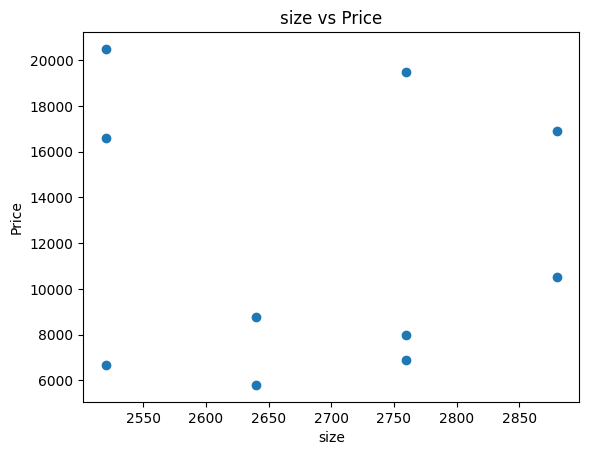

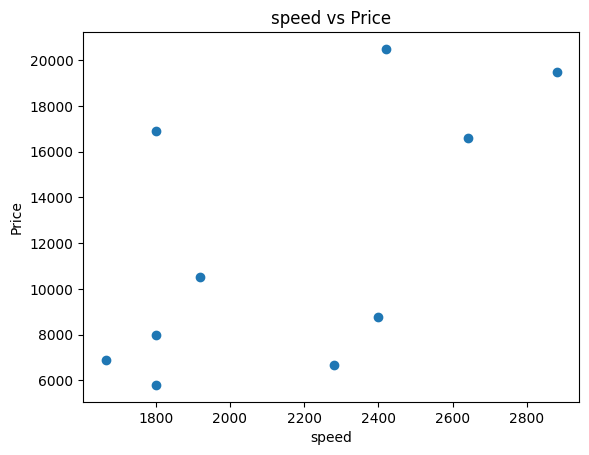

In [7]:

for column in wings_data.columns:
    if column != "price":  # Exclude the target variable
        plt.figure()
        plt.scatter(wings_data[column], wings_data['price'])
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.title(f'{column} vs Price')
        plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = wings_data[['comprehensive_score', 'cultivation_score', 'privilege_rating']]
y = wings_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to confirm the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8, 3) (8,)
Testing set shape: (2, 3) (2,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 1714.5943402414414
Mean Squared Error (MSE): 4574121.233491458


In [10]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

               Feature  Coefficient
0  comprehensive_score     1.510426
1    cultivation_score   -18.572578
2     privilege_rating    13.822264


In [11]:
print("Price range:", wings_data['price'].min(), "to", wings_data['price'].max())


Price range: 5800 to 20500


In [12]:
import joblib

# Save the model to a file
joblib.dump(model, "linear_regression_model.pkl")

# Load the model later (if needed)
loaded_model = joblib.load("linear_regression_model.pkl")

# Test it with new data (example)
new_data = [[10000, 500, 1500]]  # Replace with actual feature values
predicted_price = loaded_model.predict(new_data)
print("Predicted Price:", predicted_price)


Predicted Price: [7620.92576963]


D:\git\wing-price\wp_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
new_data = [[9940, 504, 1474]]  # Replace with actual feature values
predicted_price = loaded_model.predict(new_data)
print("Predicted Price:", predicted_price)

Predicted Price: [7096.6310311]


D:\git\wing-price\wp_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
